443
('% of range used: ', 0.0067596435546875)


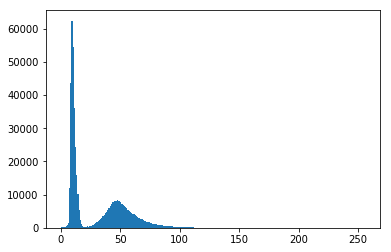

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('/home/alexn/Downloads/MD635-F117-2016.05.20-00.49.06_MD635_1_0349.tif',2)
# img = cv2.imread('/home/alexn/Downloads/MD653-F1-2016.12.20-17.47.39_MD653_1_0001.tif',2)
# img = cv2.imread('/home/alexn/Downloads/MD662&661-F1-2017.06.02-17.07.55_MD661_1_0001.tif',2)
# img = cv2.imread('/home/alexn/Downloads/MD635-F131-2016.05.20-03.59.18_MD635_3_0393.tif',2)
max_val = np.max(img.ravel())

print(max_val )
print('% of range used: ',float(max_val)/65536.0)
plt.hist(img.flatten(),256,[0,256]); plt.show()


In [21]:
2**16

65536

In [33]:
800.0/65536

0.01220703125

In [112]:
import bloscpack as bp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

def get_npz_data(filename):
    filename = filename+'.npz'
    filecontents = np.load(filename)
    data = filecontents['data']
    del filecontents
    return data


def blosc_to_npz(filename):
    file = filename+".bp";

    a = bp.unpack_ndarray_file(file)
    b = np.asarray(a)

    np.savez(filename+'.npz', data=b) # Save matrix as .npz file

    print('Size of bloscpack data:')
    print(np.shape(b)) # should be (88, 130, 53) for initial test 
    print()

def read_loc_into_array(filename):
    file = open(fn+'.bp', 'r')
    points = []

    for line in file:
        x, y = line.split(' ')
        x = int( x )
        y = int( y.replace('\n','') )
        points.append( [x,y] )
    return points
        

# Unpacking Contour Data

In [179]:
# ://mousebrainatlas-data/CSHL_labelings_v3/MD589/
contour_data = pd.read_hdf('MD589_annotation_contours_07282017191647.hdf')
num_contours = len(contour_data)
print 'Number of contours:',num_contours,'\n'
print 'List of information for every contour:\n'
print contour_data.keys()

Number of contours: 2112 

List of information for every contour:

Index([u'class', u'creator', u'downsample', u'edits', u'id', u'label_position',
       u'name', u'orientation', u'parent_structure', u'section', u'side',
       u'side_manually_assigned', u'time_created', u'type', u'vertices',
       u'filename'],
      dtype='object')


(72, 2)
Section: 322
Label position: [19430.57187739 14064.68146756]


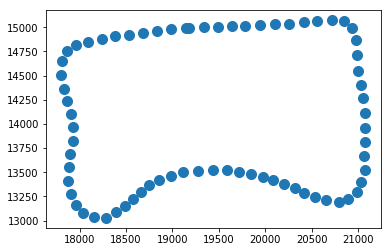

In [199]:
sample_index = 1
sample_contour = contour_data['vertices'][ sample_index ]
print np.shape(sample_contour)
print 'Section:',contour_data['section'][sample_index]
print 'Label position:',contour_data['label_position'][sample_index]


X = []
Y = []
for i in range( 0 , np.shape(sample_contour)[0] ):
    X.append(sample_contour[i][0])
    Y.append(sample_contour[i][1])
    
plt.scatter(X,Y,s=100)
plt.show()

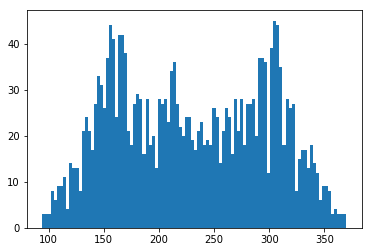

In [192]:
# Plotting histogram of the number of times a contour is drawn over each section
#  Should be mirrored
sections = []
for i in range(num_contours):
    sections.append(contour_data['section'][i])
plt.hist(sections, bins=100)
plt.show()

In [181]:
contour_data

class  creator downsample  \
100079234437553  contour  yuncong          1   
100107037338062  contour  yuncong          1   
100162395043250  contour  yuncong          1   
100235034946834  contour  yuncong          1   
100502994194257  contour  yuncong          1   
100718163659701  contour  yuncong          1   
101223415533136  contour  yuncong          1   
101460450487316  contour  yuncong          1   
101504725712070  contour  yuncong          1   
101840386133734  contour  yuncong          1   
10186124000416   contour  yuncong          1   
101862046100321  contour  yuncong          1   
10189854813704   contour  yuncong          1   
102095710676313  contour  yuncong          1   
102123515599168  contour  yuncong          1   
102186605081991  contour  yuncong          1   
102393931960076  contour  yuncong          1   
102396691223238  contour  yuncong          1   
102667967986754  contour  yuncong          1   
102704015130209  contour  yuncong          1   
102723884036827  contour  yuncong          1   
102785262345537  contour  yuncong          1   
102924078751539  contour  yuncong          1   
102924590613162  contour  yuncong          1   
102944623177325  contour  yuncong          1   
102979499906083  contour  yuncong          1   
103156033061614  contour  yuncong          1   
103253927314935  contour  yuncong          1   
103282221915975  contour  yuncong          1   
103294019952142  contour  yuncong          1   
...                  ...      ...        ...   
96988914533192   contour  yuncong          1   
97089066324549   contour  yuncong          1   
97099838575537   contour  yuncong          1   
97190930271249   contour  yuncong          1   
97207060421585   contour  yuncong          1   
97340429672842   contour  yuncong          1   
97449631206009   contour  yuncong          1   
97619745373594   contour  yuncong          1   
9782156728211    contour  yuncong          1   
97944358032204   contour  yuncong          1   
98127440005315   contour  yuncong          1   
98165515000502   contour  yuncong          1   
98165699223941   contour  yuncong          1   
98259161196270   contour  yuncong          1   
98398687223342   contour  yuncong          1   
98528022794683   contour  yuncong          1   
98562951255748   contour  yuncong          1   
98583880498179   contour  yuncong          1   
98591079510164   contour  yuncong          1   
98636941108095   contour  yuncong          1   
9876997856496    contour  yuncong          1   
98788267236053   contour  yuncong          1   
99071659916477   contour  yuncong          1   
99360805487707   contour  yuncong          1   
99453313536209   contour  yuncong          1   
99457800668779   contour  yuncong          1   
99774279993865   contour  yuncong          1   
99895369847598   contour  yuncong          1   
99933773286228   contour  yuncong          1   
99987027266147   contour  yuncong          1   

                                                             edits  \
100079234437553  [{u'username': u'yuncong', u'timestamp': u'091...   
100107037338062  [{u'username': u'yuncong', u'timestamp': u'091...   
100162395043250  [{u'username': u'yuncong', u'timestamp': u'091...   
100235034946834  [{u'username': u'yuncong', u'timestamp': u'091...   
100502994194257  [{u'username': u'yuncong', u'timestamp': u'091...   
100718163659701  [{u'username': u'yuncong', u'timestamp': u'091...   
101223415533136  [{u'username': u'yuncong', u'timestamp': u'091...   
101460450487316  [{u'username': u'yuncong', u'timestamp': u'091...   
101504725712070  [{u'username': u'yuncong', u'timestamp': u'091...   
101840386133734  [{u'username': u'yuncong', u'timestamp': u'091...   
10186124000416   [{u'username': u'yuncong', u'timestamp': u'091...   
101862046100321  [{u'username': u'yuncong', u'timestamp': u'091...   
10189854813704   [{u'username': u'yuncong', u'timestamp': u'091...   
102095710676313  [{u'username': u'yuncong', u'timestamp': u'09

# Loading inception-bn-blue features/locations

In [120]:
# Loading features
fn = 'MD662&661-F132-2017.06.07-20.06.12_MD662_3_0396_prep2_none_win7_inception-bn-blue_features'
#blosc_to_npz(fn)
data_features = get_npz_data(fn)
# Loading locations
fn = 'MD662&661-F132-2017.06.07-20.06.12_MD662_3_0396_prep2_none_win7_inception-bn-blue_locations'
data_locations = read_loc_into_array(fn)

print np.shape(data_features)
print np.shape(data_locations)

(32105, 1024)
(32105, 2)


# Test on sparse matrix

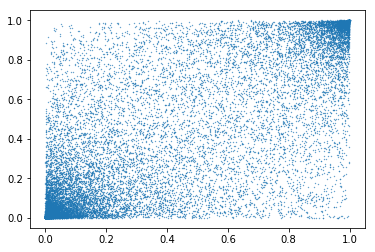

In [44]:
# Loading Sparse matrix. NOT SURE WHAT THIS IS FOR
fn = 'MD662&661-F44-2017.06.05-21.36.28_MD662_2_0131_prep2_gray_detector1_7N_sparseScores.npz'
data = get_npz_data(fn)

X = []
Y = []
for i in range(0,len(data)):
    if i%2==0:
        X.append(data[i])
    else:
        Y.append(data[i])
        
plt.scatter(X,Y,s=.1)
plt.show()